<a href="https://colab.research.google.com/github/mightyshibbu/-HactoberFest2023-For_All_Beginers-/blob/main/Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import the required libraries

In [2]:
##---------Type the code below this line------------------##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers # This import is also necessary for 'layers'



# 2. Data Acquisition

For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL



In [3]:
##---------Type the code below this line------------------##

# Load your dataset
data = pd.read_csv('fashion-mnist_train.csv')

# Show basic information
print(data.head())
print("\nDataset Info:")
print(data.info())


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0       0.0      30.0      43.0       0.0   
3       0  ...       3.0       0.0       0.0       0.0       0.0       1.0   
4       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.

# 3. Data Preparation

Perform the data preprocessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

In [25]:
##---------Type the code below this line------------------##

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Drop rows with missing values (or you could impute instead)
data_cleaned = data.dropna()

# Encode categorical variables if any
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Separate features and target
X = data_cleaned.drop('label', axis=1)
y = data_cleaned['label']

# Split first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# fit scaler only on
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Important: use transform, not fit_transform

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Missing values per column:
 label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    1
pixel781    1
pixel782    1
pixel783    1
pixel784    1
Length: 785, dtype: int64
Training samples: 5965, Testing samples: 663


## 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using

* DNN / CNN / RNN / Transformer



In [26]:
##---------Type the code below this line------------------##

from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.regularizers import l2

model = Sequential([
    Input(shape=(784,)),
    Dense(256, activation='relu'),  # Larger hidden layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),

    Dense(10, activation='softmax')  # 10 classes: pants, shirt, etc.
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285,898 (1.09 MB)

 Trainable params: 284,874 (1.09 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [42]:
# ##---------Type the code below this line------------------##

# from keras.models import Sequential
# from keras.layers import Dense, Input, Dropout, BatchNormalization
# from keras.regularizers import l2  # You need to import this!

# model = Sequential([
#     Input(shape=(784,)),
#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
#     Dense(10, activation='softmax')  # Final output layer for 10-class classification
# ])

# # Compile the model
# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,466 (216.66 KB)

 Trainable params: 55,274 (215.91 KB)

 Non-trainable params: 192 (768.00 B)

## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters



# 5. Training the model


In [43]:
# Configure the training by setting appropriate hyperparameters and using suitable loss and optimizer.
##---------Type the code below this line------------------##

# Train the model with a validation split to monitor overfitting.
history = model.fit(
    X_train,
    y_train,
    epochs=200,             # Adjust epochs as needed.
    batch_size=8,         # You can experiment with different batch sizes.
    validation_split=0.1,  # 10% of the training data will be used for validation.
    verbose=1
)


Epoch 1/200
671/671 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4518 - loss: 1.6230 - val_accuracy: 0.7554 - val_loss: 0.7081
Epoch 2/200
671/671 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6686 - loss: 0.9856 - val_accuracy: 0.8040 - val_loss: 0.5954
Epoch 3/200
671/671 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7051 - loss: 0.8870 - val_accuracy: 0.8208 - val_loss: 0.5454
Epoch 4/200
671/671 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7374 - loss: 0.7944 - val_accuracy: 0.8325 - val_loss: 0.5227
Epoch 5/200
671/671 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7689 - loss: 0.7134 - val_accuracy: 0.8308 - val_loss: 0.5270
Epoch 6/200
671/671 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7813 - loss: 0.6894 - val_accuracy: 0.8174 - val_loss: 0.5263
Epoch 7/200
671/671 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7828 - loss: 0.6736 - val_accuracy: 0.8124 - val_loss: 0.5214
Epoch 8/200
671/671 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7846 - loss: 0.6965 - val_accu

# 6. Test the model


In [40]:
##---------Type the code below this line------------------##

# Evaluate the model on the test dataset.
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.7675
Test Accuracy: 0.8477


# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


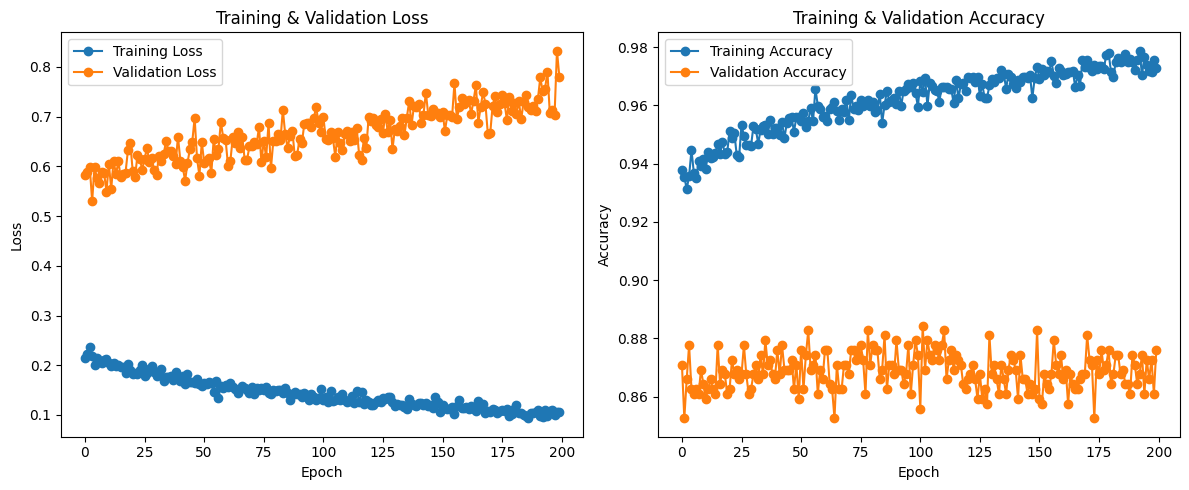

In [41]:
##---------Type the code below this line------------------##

# Plot the training and validation loss and accuracy for each epoch.

plt.figure(figsize=(12, 5))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'o-', label='Training Loss')
plt.plot(history.history['val_loss'], 'o-', label='Validation Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'o-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'o-', label='Validation Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


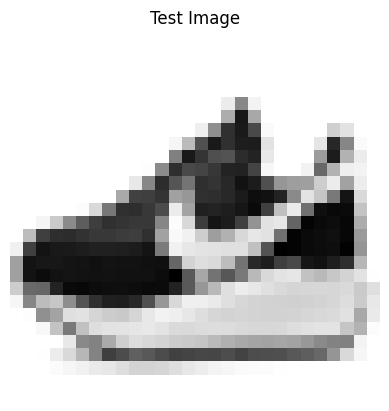

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted class: 2
Predicted Label: Pullover


In [50]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
# img = Image.open('cloth.png').convert('L')  # Convert to grayscale
img = Image.open('shoe1.png').convert('L')  # Convert to grayscale
# img = Image.open('pants.png').convert('L')  # Convert to grayscale

# Resize to 28x28 (Fashion-MNIST size)
img = img.resize((28, 28))

# Convert image to numpy array and normalize
img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]

# Optional: Show the image
plt.imshow(img_array, cmap='gray')
plt.title("Test Image")
plt.axis('off')
plt.show()

# Flatten to 784-dim vector (1D array) for prediction
img_flat = img_array.flatten().reshape(1, 784)  # Shape: (1, 784)

# Predict using your trained model
prediction = model.predict(img_flat)

# Get predicted class
predicted_class = np.argmax(prediction)

print(f"Predicted class: {predicted_class}")
label_map = {
    0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress",
    4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker",
    8: "Bag", 9: "Ankle boot"
}

print("Predicted Label:", label_map[predicted_class])
